Using method: spearman


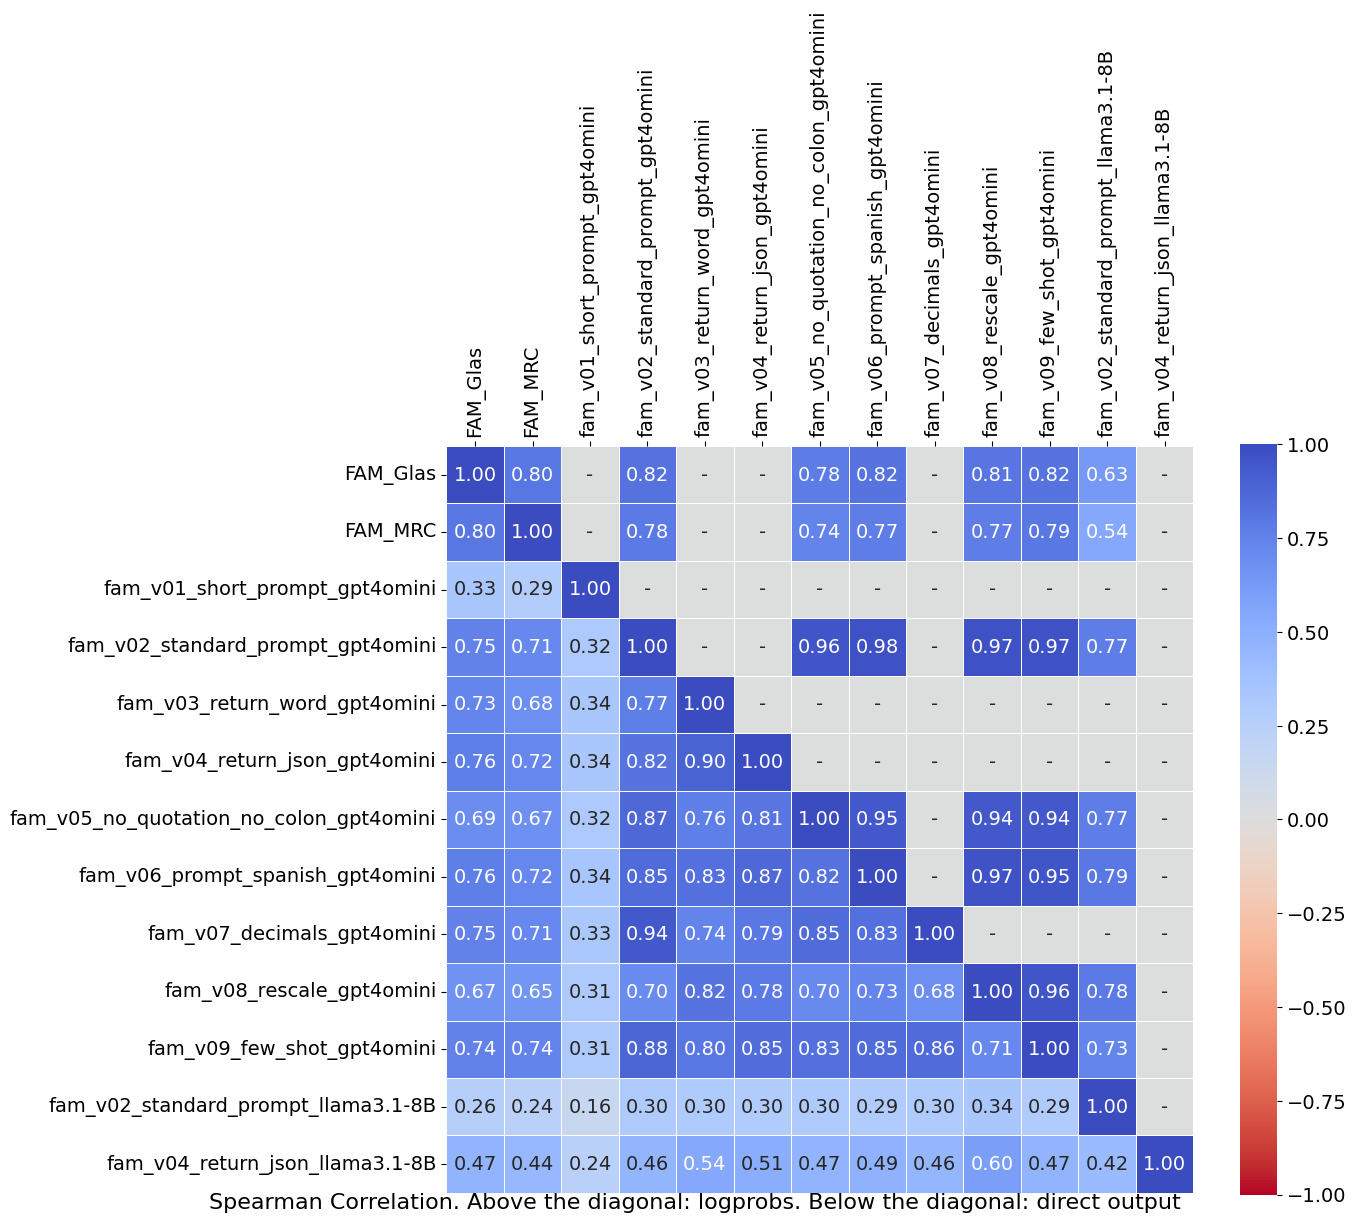

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors

method = 'pearson'  # method correlation

print(f"Using method: {method}")

# Read data
df = pd.read_excel('Glasgow_MRC_joint_norms_inner_join_english_output.xlsx')

# Select familiarity feature columns
features_cols = [col for col in df.columns if col.startswith('fam') or col.startswith('FAM')]
df_features = df[features_cols].apply(pd.to_numeric, errors='coerce')

# Select logprob-based familiarity features
features_logprobs_cols = [col for col in df.columns if col.startswith('logprobs') or col.startswith('FAM')]
df_features_logprobs = df[features_logprobs_cols]
df_features_logprobs.columns = [col.replace('logprobs_', 'fam_') for col in df_features_logprobs.columns]
df_features_logprobs = df_features_logprobs.apply(pd.to_numeric, errors='coerce')

# Correlations
corr = df_features.corr(method=method)
corr_logprobs = df_features_logprobs.corr(method=method)

# Create upper/lower triangle masks
mask_upper = np.triu(np.ones_like(corr_logprobs, dtype=bool), k=1)
mask_lower = np.tril(np.ones_like(corr, dtype=bool), k=0)

# Combine correlation matrices
combined_corr = pd.DataFrame(np.full_like(corr, np.nan),
                             columns=corr.columns,
                             index=corr.index)
combined_corr.values[mask_upper] = corr_logprobs.values[mask_upper]
combined_corr.values[mask_lower] = corr.values[mask_lower]

# Annotation matrix: 2 decimal values or "-" for NaNs
annotations = combined_corr.copy()
annotations = annotations.map(lambda x: f"{x:.2f}" if pd.notna(x) else "-")

# Custom colormap with gray for NaNs
cmap = plt.cm.coolwarm_r.copy()
cmap.set_bad(color='gray')  # gray color for NaNs

# Replace NaNs with a "visible" value for heatmap so the cell is rendered,
# but still keep the annotation as "-"
combined_corr_filled = combined_corr.copy()
combined_corr_filled = combined_corr_filled.fillna(0)  # fill NaN so it's plotted

# Create mask to avoid modifying display of non-NaN values
nan_mask = combined_corr.isna()

# Replace original values with NaN where we actually want gray + text
cmap_data = combined_corr_filled.mask(~nan_mask, combined_corr)

# Plot
plt.figure(figsize=(14, 12))
ax = sns.heatmap(cmap_data,
                 annot=annotations,
                 fmt='',
                 cmap=cmap,
                 square=True,
                 cbar=True,
                 linewidths=0.5,
                 linecolor='white',
                 vmin=-1, vmax=1,
                 annot_kws={"size": 14})  # Optional: ensures symmetric color scaling

# Adjust x-axis
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=90, ha='center')
plt.xticks(fontsize=14)

# Adjust y-axis
plt.yticks(fontsize=14)

# Add bottom title
plt.figtext(0.5, 0.01, f"{method.capitalize()} Correlation. Above the diagonal: logprobs. Below the diagonal: direct output",
           fontsize=16, ha='center')

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14) 

plt.tight_layout()
plt.show()


Upper: pearson, Lower: spearman


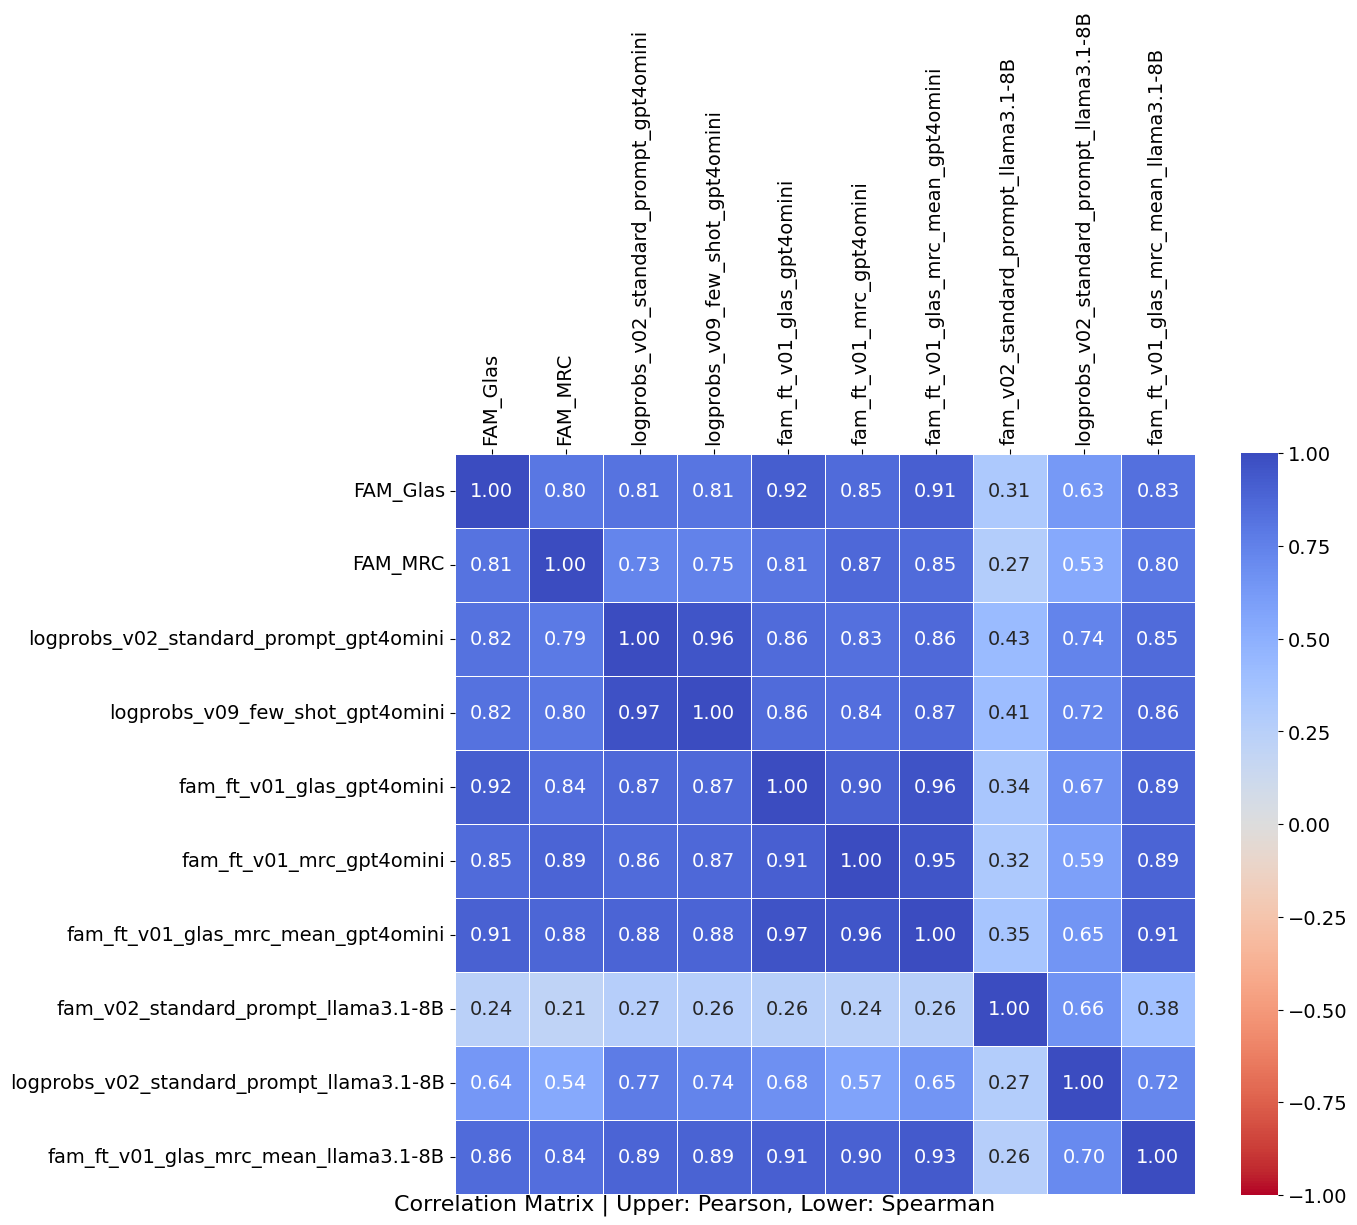

In [4]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configuración
method_upper = 'pearson'
method_lower = 'spearman'
print(f"Upper: {method_upper}, Lower: {method_lower}")

# Leer datos
df_ft = pd.read_excel('1_test_random_MRC_Glas.xlsx')

# Seleccionar columnas de familiaridad
features_cols = [col for col in df_ft.columns if col.startswith('fam_') or col.startswith('FAM') or col.startswith('logprobs_')]
df_features_ft = df_ft[features_cols].apply(pd.to_numeric, errors='coerce')

# Calcular matrices de correlación
corr_upper = df_features_ft.corr(method=method_upper)
corr_lower = df_features_ft.corr(method=method_lower)

# Crear máscara para triángulo superior e inferior
mask_upper = np.triu(np.ones_like(corr_upper, dtype=bool), k=1)
mask_lower = np.tril(np.ones_like(corr_lower, dtype=bool), k=0)

# Combinar las matrices
combined_corr = pd.DataFrame(np.full_like(corr_upper, np.nan),
                             columns=corr_upper.columns,
                             index=corr_upper.index)

combined_corr.values[mask_upper] = corr_upper.values[mask_upper]
combined_corr.values[mask_lower] = corr_lower.values[mask_lower]

# Crear anotaciones
annotations = combined_corr.copy()
annotations = annotations.map(lambda x: f"{x:.2f}" if pd.notna(x) else "-")

# Crear colormap con gris para NaNs
cmap = plt.cm.coolwarm_r.copy()
cmap.set_bad(color='gray')

# Rellenar NaNs para visualización
combined_corr_filled = combined_corr.fillna(0)
nan_mask = combined_corr.isna()
cmap_data = combined_corr_filled.mask(~nan_mask, combined_corr)

# Graficar
plt.figure(figsize=(14, 12))
ax = sns.heatmap(cmap_data,
                 annot=annotations,
                 fmt='',
                 cmap=cmap,
                 square=True,
                 cbar=True,
                 linewidths=0.5,
                 linecolor='white',
                 vmin=-1, vmax=1,
                 annot_kws={"size": 14})

# Ajustes de ejes
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=90, ha='center', fontsize=14)
plt.yticks(fontsize=14)

# Título
plt.figtext(0.5, 0.01, f"Correlation Matrix | Upper: {method_upper.capitalize()}, Lower: {method_lower.capitalize()}",
            fontsize=16, ha='center')

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)

plt.tight_layout()
plt.show()

